In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("robikscube/textocr-text-extraction-from-images-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/robikscube/textocr-text-extraction-from-images-dataset/versions/2


In [ ]:
import os
print(os.listdir(path))

['annot.csv', 'TextOCR_0.1_train.json', 'train_val_images', 'img.parquet', 'annot.parquet', 'img.csv']


In [ ]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image

plt.style.use("ggplot")

In [ ]:
annot=pd.read_parquet(path+'/annot.parquet')
imgs=pd.read_parquet(path+'/img.parquet')

In [ ]:
img_fns=glob(path+'/train_val_images/train_images/*')

Plotting Example images

In [ ]:
image_id=img_fns[0].split('/')[-1].split('.')[0]

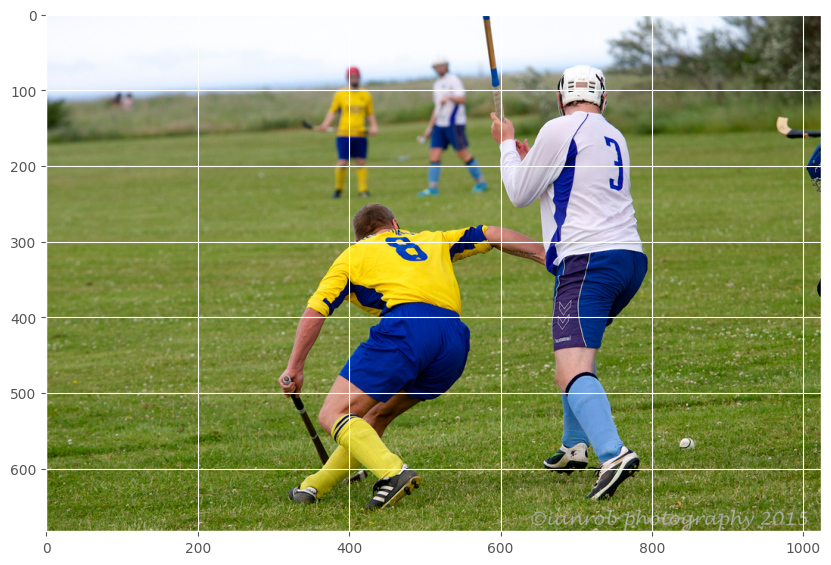

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
ax.imshow(plt.imread(img_fns[0]))
plt.show()

In [ ]:
annot.query('image_id==@image_id')

,id,image_id,bbox,utf8_string,points,area
970083,aba287a780b51467_1,aba287a780b51467,"[670.4, 424.39, 24.63, 11.5]",.,"[670.4, 427.84, 694.54, 424.39, 695.03, 432.77...",283.25
970084,aba287a780b51467_2,aba287a780b51467,"[736.08, 159.39, 27.59, 76.2]",3,"[736.08, 159.39, 763.02, 163.33, 763.67, 235.5...",2102.36
970085,aba287a780b51467_3,aba287a780b51467,"[441.47, 289.45, 70.94, 43.03]",8,"[441.47, 295.36, 476.28, 289.45, 512.41, 323.6...",3052.55
970086,aba287a780b51467_4,aba287a780b51467,"[414.21, 288.14, 23.65, 13.79]",.,"[414.21, 291.09, 437.86, 288.14, 436.87, 299.6...",326.13
970087,aba287a780b51467_5,aba287a780b51467,"[448.69, 282.22, 41.06, 13.14]",.,"[448.69, 282.22, 489.75, 283.54, 489.75, 295.3...",539.53
970088,aba287a780b51467_6,aba287a780b51467,"[396.24, 119.17, 24.9, 11.89]",.,"[396.61, 119.55, 421.14, 119.17, 420.57, 130.4...",296.06
970089,aba287a780b51467_7,aba287a780b51467,"[624.68, 312.74, 23.0, 6.4]",.,"[624.68, 316.14, 647.68, 319.14, 647.48, 315.3...",147.20
970090,aba287a780b51467_8,aba287a780b51467,"[606.38, 309.74, 17.4, 6.2]",.,"[606.38, 313.34, 623.58, 315.94, 623.78, 312.2...",107.88
970091,aba287a780b51467_9,aba287a780b51467,"[612.88, 313.94, 13.8, 6.0]",.,"[612.88, 317.84, 626.58, 319.94, 626.68, 316.0...",82.80
970092,aba287a780b51467_10,aba287a780b51467,"[627.28, 315.84, 13.7, 6.2]",.,"[627.28, 319.94, 640.98, 322.04, 640.88, 318.1...",84.94


In [ ]:
# first 25 images
fig,axs=plt.subplots(5,5 ,figsize=(20,20))
axs=axs.flatten()
for i in range(25):
  axs[i].imshow(plt.imread(img_fns[i]))
  axs[i].axis("off")
  image_id=img_fns[i].split('/')[-1].rstrip('.jpg')
  n_annot=len(annot.query('image_id==@image_id'))
  axs[i].set_title(f"{image_id} - {n_annot}")
plt.show()

Method one PYTESSERACT

In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
import pytesseract

In [ ]:
print(pytesseract.image_to_string(img_fns[25],lang="eng"))

In [ ]:
img_fns[18]

'/root/.cache/kagglehub/datasets/robikscube/textocr-text-extraction-from-images-dataset/versions/2/train_val_images/train_images/bdbd16f54641f6ec.jpg'

(-0.5, 767.5, 1023.5, -0.5)

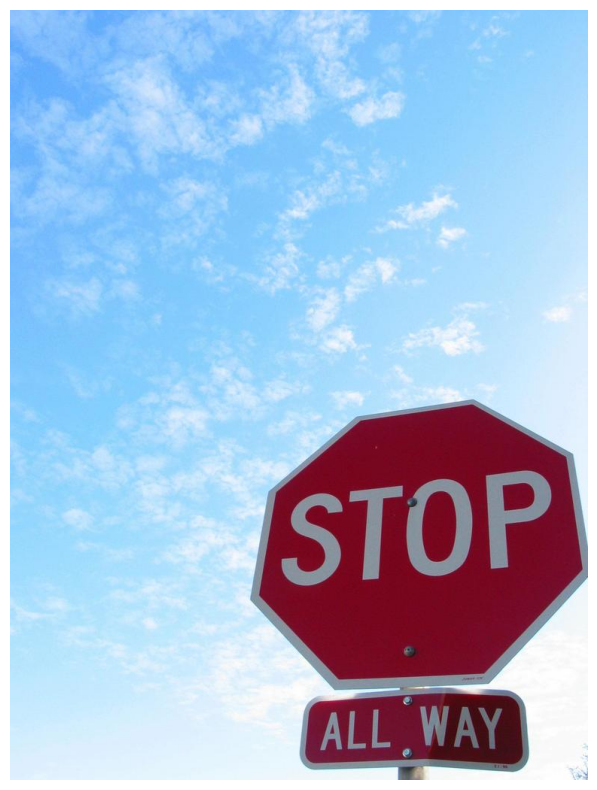

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
ax.imshow(plt.imread(img_fns[25]))
ax.axis("off")

Pytesseract seems to not work well with image it rather prefers working with documents

## METHOD 2:EASY OCR

In [ ]:
pip install easyocr -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
import easyocr
reader=easyocr.Reader(['en'],gpu=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
results=reader.readtext(img_fns[25])

In [ ]:
pd.DataFrame(results,columns=['bbox','text','confidence'])

,bbox,text,confidence
0,"[[408, 916], [664, 916], [664, 994], [408, 994]]",ALL. WAY,0.614421
1,"[[351.07560908989365, 624.1031645360108], [731...",STOP,0.999809


KERAS OCR

In [ ]:
!pip uninstall -y keras-ocr numpy tensorflow keras -q
!pip install tensorflow==2.12 keras==2.12 keras-ocr numpy==1.23.5 -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5

In [ ]:
import keras_ocr
pipeline=keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
results=pipeline.recognize([img_fns[25]])

1/1 [==============================] - 4s 4s/step


In [ ]:
pd.DataFrame(results[0],columns=["text","bbox"])

,text,bbox
0,stop,"[[355.94305, 631.87933], [714.91266, 604.102],..."
1,way,"[[545.2957, 918.26855], [658.10504, 925.3191],..."
2,all,"[[412.69144, 930.5091], [509.46066, 927.6629],..."


<Axes: >

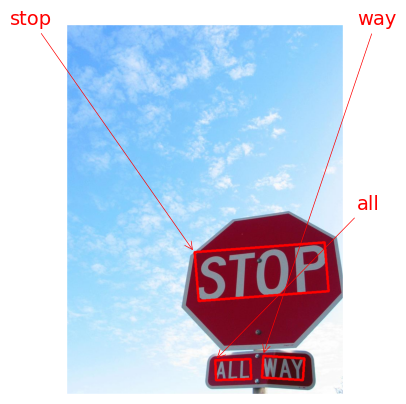

In [ ]:
keras_ocr.tools.drawAnnotations(plt.imread(img_fns[25]),results[0])

In [ ]:
# compairing easy_ocr vs the keras_ocr

In [ ]:
reader=easyocr.Reader(['en'],gpu=True)
dfs=[]
for img in tqdm(img_fns[:25]):
  result=reader.readtext(img)
  image_id=img.split('/')[-1].split('.')[0]
  image_df=pd.DataFrame(result,columns=["bbox","text","conf"])
  image_df["image_id"]= image_id
  dfs.append(image_df)
easyocr_df=pd.concat(dfs)

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
easyocr_df

,bbox,text,conf,image_id
0,"[[637, 651], [1013, 651], [1013, 683], [637, 6...",Oianrob photography 2015,0.770143,aba287a780b51467
0,"[[239, 251], [273, 251], [273, 267], [239, 267]]",2nd,0.947013,3f0ab27b9b126b68
1,"[[289, 251], [315, 251], [315, 267], [289, 267]]",Tst,0.762339,3f0ab27b9b126b68
2,"[[313, 244], [428, 244], [428, 270], [313, 270]]",Century BC,0.876780,3f0ab27b9b126b68
3,"[[0, 271], [111, 271], [111, 289], [0, 289]]",acinci t0 7o Nuiid,0.088117,3f0ab27b9b126b68
...,...,...,...,...
4,"[[202, 475], [280, 475], [280, 505], [202, 505]]",778858,0.007489,0789e1d8064d6697
5,"[[817.1723941113976, 169.1792670450748], [863....",estelote,0.069742,0789e1d8064d6697
6,"[[818.6012738885855, 182.08292994374676], [864...",E,0.471395,0789e1d8064d6697
7,"[[47.25721864729179, 408.1430466182295], [93.9...",32I,0.108164,0789e1d8064d6697


In [ ]:
pipeline=keras_ocr.pipeline.Pipeline()
dfs=[]
for img in tqdm(img_fns[:25]):
  results=pipeline.recognize([img])
  result=results[0]
  image_id=img.split('/')[-1].split('.')[0]
  image_df=pd.DataFrame(result,columns=["text","bbox"])
  image_df["image_id"]= image_id
  dfs.append(image_df)
kerasocr_df=pd.concat(dfs)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


  0%|          | 0/25 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 3s 3s/step


In [ ]:
kerasocr_df.head()

,text,bbox,image_id
0,s,"[[677.0, 381.0], [693.0, 381.0], [693.0, 418.0...",aba287a780b51467
1,bnotography,"[[761.0, 656.0], [936.0, 656.0], [936.0, 682.0...",aba287a780b51467
2,201b,"[[943.0, 658.0], [1008.0, 658.0], [1008.0, 680...",aba287a780b51467
3,cannos,"[[644.0, 660.0], [756.0, 660.0], [756.0, 679.0...",aba287a780b51467
0,dselo,"[[272.0, 116.0], [309.0, 116.0], [309.0, 123.0...",3f0ab27b9b126b68


PLOTING THE COMPARISON BETWEEN THE TWO

In [ ]:
def plot_compare(image_fn,easyocr_df,kerasocr_df):
  image_id=image_fn.split('/')[-1].split('.')[0]
  fig,axs=plt.subplots(1,2,figsize=(15,10))
  easy_results=easyocr_df.query("image_id==@image_id")[['text','bbox']].values.tolist()
  easy_results=[(x[0], np.array(x[1])) for x in easy_results]
  keras_ocr.tools.drawAnnotations(plt.imread(image_fn),
                                  easy_results,ax=axs[0])
  # axs[0].axis("off")
  axs[0].set_title("easy_ocr_results",fontsize=24)
  keras_results=kerasocr_df.query("image_id==@image_id")[['text','bbox']].values.tolist()
  keras_results=[(x[0], np.array(x[1])) for x in keras_results]
  keras_ocr.tools.drawAnnotations(plt.imread(image_fn),
                                  keras_results,ax=axs[1])
  axs[1].set_title("keras_ocr_results",fontsize=24)
  plt.show()

In [ ]:
for img_fn in img_fns[:25]:
  plot_compare(img_fn,easyocr_df,kerasocr_df)